In [1]:
# project: p13
# submitter: Kmconrad3
# partner: Akroubal
# hours: 8

In [2]:
import requests, math, json, sqlite3
import os, pandas as pd
from pandas import DataFrame
from bs4 import BeautifulSoup

In [3]:
def download(filename, url):
    #we don't download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!") 
    r = requests.get(url)
    r.raise_for_status()
    f = open(filename, 'wb')
    f.write(r.content)
    f.close()      
    return (str(filename) + " created!")

download('countries.json', 'https://raw.githubusercontent.com/msyamkumar/cs220-s21-projects/master/p12/countries.json')

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [4]:
countries = pd.read_json("countries.json")
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [5]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

In [6]:
query = 'select * from countries'
pd.read_sql(query, conn)

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2381740,17.14,0.04,Africa,Algeria,4.61,6000,31.00,"70,0",-0.39,"78,1",32930091,NORTHERN AFRICA
170,103000,13.64,4.83,Europe,Iceland,6.72,30900,3.31,"99,9",2.38,"647,7",299388,WESTERN EUROPE
171,748,25.37,56.02,Australia,Tonga,5.28,2200,12.62,"98,5",0.00,"97,7",114689,OCEANIA
172,27750,36.44,6.38,North America,Haiti,12.17,1600,73.45,"52,9",-3.40,"16,9",8308504,LATIN AMER. & CARIB


In [7]:
#q1
query = """
  SELECT CONTINENT, COUNT(*) AS "number of countries"
  from countries 
  group by continent 
  ORDER BY "number of countries" DESC, continent 

 """
contvscountry = pd.read_sql(query, conn)
contvscountry

,continent,number of countries
0,Africa,47
1,Europe,41
2,Asia,38
3,North America,24
4,Australia,12
5,South America,12


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

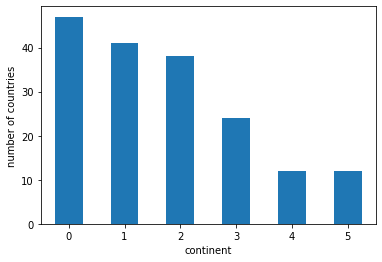

In [8]:
#q2
axes = contvscountry.plot.bar('continent', 'number of countries')
axes.set_ylabel("number of countries")
axes.get_legend().remove()
axes.set_xticklabels(list(contvscountry.index), rotation = 0)

In [9]:
#q3
query = """SELECT CONTINENT, (sum(population) / (1000000.00)) AS "total population (million)"

  from countries 
  group by continent 
  ORDER BY "total population (million)" DESC  

   

 """
contvspop = pd.read_sql(query, conn)
contvspop

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


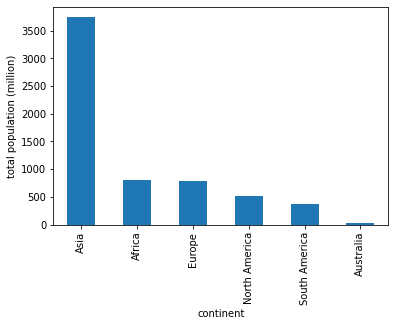

In [10]:
#q4
axes2 = contvspop.plot.bar('continent', 'total population (million)')
axes2.set_ylabel("total population (million)")
axes2.set_xlabel("continent")
axes2.get_legend().remove()

In [11]:
#q5
query = """SELECT COUNTRY, sum(population) AS population

  from countries 
  where continent == 'South America' 
  group by country 
  ORDER BY "population" DESC  
   

 """
contvspop = pd.read_sql(query, conn)
contvspop

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [12]:
#q6
query = """SELECT COUNTRY, (population * ("gdp-per-capita"))/1000000000.00 AS "Real GDP (billion)"

  from countries  
  group by country 
  ORDER BY "Real GDP (billion)" DESC  

   

 """
countryvsgdp = pd.read_sql(query, conn)
actual = countryvsgdp.iloc[:10]
actual

,country,Real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


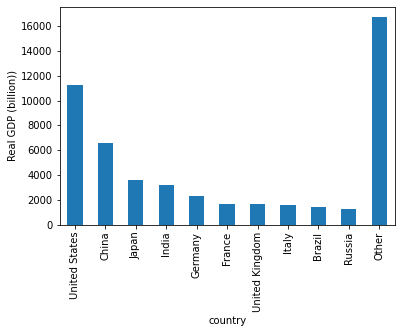

In [13]:
#q7
other = (countryvsgdp["Real GDP (billion)"].iloc[10:].sum())
db = pd.DataFrame({'country': ['Other'], "Real GDP (billion)": [other]})
other = (countryvsgdp["Real GDP (billion)"].iloc[10:].sum())
r = actual.append(db)
r
axes = r.plot.bar("country", "Real GDP (billion)")
axes.set_ylabel("Real GDP (billion))")
axes.set_xlabel("country")
axes.get_legend().remove()

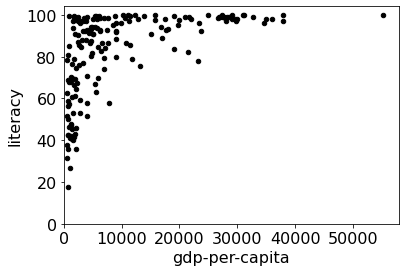

In [14]:
#q8
countries['literacy']
countries['gdp-per-capita']
countries['literacy']
seriesoflit = countries['literacy']
correctvals = (seriesoflit.str.replace(',', '.'))
correctvals2 = correctvals.astype(float)
scatter(countries['gdp-per-capita'], correctvals2, xlabel = 'gdp-per-capita', ylabel = 'literacy')

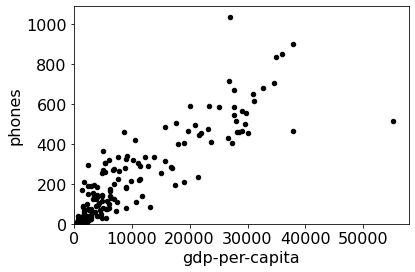

In [15]:
#q9
countries['gdp-per-capita']
countries['phones']
phonestrings = (countries['phones'].str.replace(',', '.'))
floatphones = phonestrings.astype(float)
scatter(countries['gdp-per-capita'], floatphones, xlabel = 'gdp-per-capita', ylabel = 'phones')

In [16]:
#q10
db = pd.DataFrame({'gdp-per-capita': countries['gdp-per-capita'], 'phones': floatphones}) 
db.corr().iloc[0][1]

0.8786946640591311

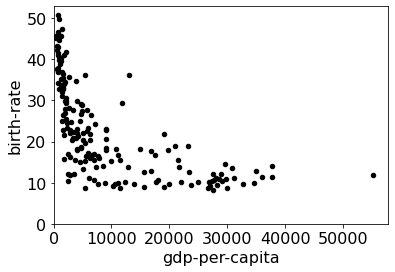

In [17]:
#q11
countries['gdp-per-capita']
countries['birth-rate']
scatter(countries['gdp-per-capita'], countries['birth-rate'], xlabel = 'gdp-per-capita', ylabel = 'birth-rate')

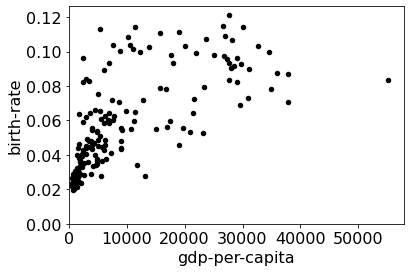

In [18]:
#q12
countries['gdp-per-capita']
countries['birth-rate']
scatter(countries['gdp-per-capita'], (1/countries['birth-rate']), xlabel = 'gdp-per-capita', ylabel = 'birth-rate')

In [19]:
import numpy as np

df = DataFrame({
    "gdp-per-capita": countries['gdp-per-capita'],
    "inverse-birth-rate": (1/countries['birth-rate'])
})
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse-birth-rate"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
#ax = df.plot.scatter(x='gdp-per-capita', y='inverse-birth-rate')

#df["fit"] = df["gdp-per-capita"] * m + n
#df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [20]:
#q13
(m,n)

(1.8365703926233426e-06, 0.03916624252079352)

In [21]:
#q14
y = (m * 30000) + n
1/y

10.60857644448761

<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse-birth-rate'>

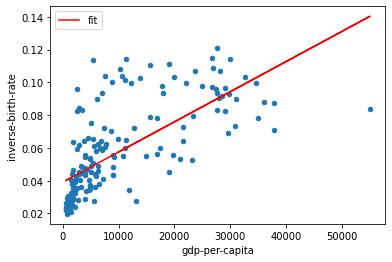

In [22]:
#q15
ax = df.plot.scatter(x='gdp-per-capita', y='inverse-birth-rate')

df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [23]:
#q16
query = """SELECT COUNTRY, `Birth-Rate`, `Death-Rate`

  from countries  
  group by country   
  order by (`Birth-Rate`-`Death-Rate`) DESC
  LIMIT 15
 """

countrybd = pd.read_sql(query, conn)
countrybd

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


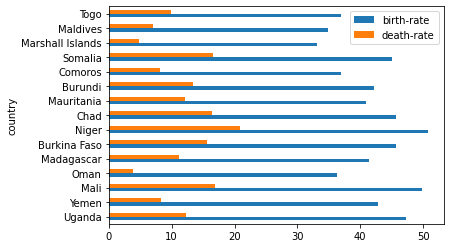

In [24]:
#q17
countrybd = countrybd.set_index('country')
ax = countrybd.plot.barh()

<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

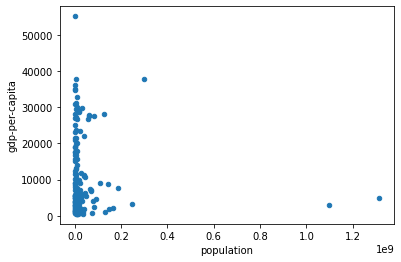

In [25]:
#q18
query = """SELECT "gdp-per-capita", "population"

  FROM countries  
 """

gdp_cap = pd.read_sql(query, conn)
gdp_cap.plot.scatter(x = "population",y = "gdp-per-capita")

In [26]:
#q19
query = """SELECT country, population, "gdp-per-capita"
  FROM countries 
  WHERE (population >= 298000000) OR ("gdp-per-capita"=55100)
  ORDER BY "gdp-per-capita" ASC
 """

outlie = pd.read_sql(query, conn)
outlie

,country,population,gdp-per-capita
0,India,1095351995,2900
1,China,1313973713,5000
2,United States,298444215,37800
3,Luxembourg,474413,55100


Text(0, 0.5, '')

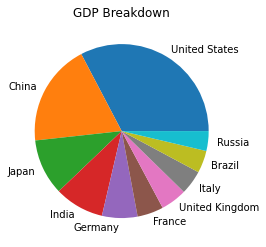

In [27]:
#q20
actual=actual.set_index("country")
ax = actual.plot.pie(y="Real GDP (billion)", title= "GDP Breakdown")
ax.get_legend().remove()
ax.set_ylabel("")